## Support Vector Machine and Decision Trees
##### *affairs2.csv* dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [6]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
orig_df.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


In [7]:
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [227]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [228]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance

In [229]:
from sklearn import svm
model1 = svm.SVC(kernel='linear', C=1)

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], test_size=0.20, 
                                                    random_state=101)

In [232]:
model1.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [233]:
predictions1 = model1.predict(X_test)

In [234]:
from sklearn.metrics import classification_report, accuracy_score

In [235]:
print(classification_report(y_test, predictions1))
print(accuracy_score(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493


### Question 2. Now try different value of C-parameter and rerun your model

In [236]:
# Try C = 2**-5 and 2**5

In [237]:
model2 = svm.SVC(kernel='linear', C=2**-5)
model2.fit(X_train, y_train)

SVC(C=0.03125, kernel='linear')

In [238]:
predictions2 = model2.predict(X_test)
print(classification_report(y_test, predictions2))
print(accuracy_score(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       850
           1       0.64      0.25      0.36       424

    accuracy                           0.70      1274
   macro avg       0.68      0.59      0.59      1274
weighted avg       0.69      0.70      0.66      1274

0.7048665620094191


In [239]:
model3 = svm.SVC(kernel='linear', C=2**5)
model3.fit(X_train, y_train)

SVC(C=32, kernel='linear')

In [240]:
predictions3 = model3.predict(X_test)
print(classification_report(y_test, predictions3))
print(accuracy_score(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

0.7056514913657771


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [241]:
model4 = svm.SVC(kernel = 'rbf', C=1, gamma=2**-5)
model4.fit(X_train, y_train)

SVC(C=1, gamma=0.03125)

In [242]:
predictions4 = model4.predict(X_test)
print(classification_report(y_test, predictions4))
print(accuracy_score(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

0.7111459968602826


In [243]:
model5 = svm.SVC(kernel = 'rbf', C=1, gamma=0.1)
model5.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [244]:
predictions5 = model5.predict(X_test)
print(classification_report(y_test, predictions5))
print(accuracy_score(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       850
           1       0.59      0.31      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

0.7001569858712716


In [245]:
model6 = svm.SVC(kernel = 'rbf', C=1, gamma=1)
model6.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [246]:
predictions6 = model6.predict(X_test)
print(classification_report(y_test, predictions6))
print(accuracy_score(y_test, predictions6))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66      0.62      1274

0.6577708006279435


In [247]:
model7 = svm.SVC(kernel = 'rbf', C=1, gamma=2)
model7.fit(X_train, y_train)

SVC(C=1, gamma=2)

In [248]:
predictions7 = model7.predict(X_test)
print(classification_report(y_test, predictions7))
print(accuracy_score(y_test, predictions7))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       850
           1       0.40      0.16      0.23       424

    accuracy                           0.64      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.64      0.59      1274

0.6420722135007849


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

In [249]:
print("model4, with kernel=rbf, C=1, and gamma=2**-5 yields the best accuracy results (0.7111459968602826) and F1 score (0.42)")

model4, with kernel=rbf, C=1, and gamma=2**-5 yields the best accuracy results (0.7111459968602826) and F1 score (0.42)


# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [250]:
from sklearn.tree import DecisionTreeClassifier
model8 = DecisionTreeClassifier()

In [251]:
model8.fit(X_train,y_train)

DecisionTreeClassifier()

In [252]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [253]:
predictions8 = model8.predict(X_test)
print(confusion_matrix(y_test,predictions8))
print(classification_report(y_test,predictions8))
print(accuracy_score(y_test, predictions8))

[[646 204]
 [259 165]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       850
           1       0.45      0.39      0.42       424

    accuracy                           0.64      1274
   macro avg       0.58      0.57      0.58      1274
weighted avg       0.63      0.64      0.63      1274

0.6365777080062794


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

Type your code here

In [254]:
model9 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model9.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [255]:
predictions9 = model9.predict(X_test)
print(confusion_matrix(y_test,predictions9))
print(classification_report(y_test,predictions9))
print(accuracy_score(y_test, predictions9))

[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [256]:
model10 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model10.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [257]:
predictions10 = model10.predict(X_test)
print(confusion_matrix(y_test,predictions10))
print(classification_report(y_test,predictions10))
print(accuracy_score(y_test, predictions10))

[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [258]:
model11 = DecisionTreeClassifier(max_depth=3, criterion ='gini')
model11.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [259]:
predictions11 = model11.predict(X_test)
print(confusion_matrix(y_test,predictions11))
print(classification_report(y_test,predictions11))
print(accuracy_score(y_test, predictions11))

[[734 116]
 [277 147]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [260]:
model12 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model12.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [261]:
predictions12 = model12.predict(X_test)
print(confusion_matrix(y_test,predictions12))
print(classification_report(y_test,predictions12))
print(accuracy_score(y_test, predictions12))

[[734 116]
 [277 147]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [262]:
model13 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model13.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [263]:
predictions13 = model13.predict(X_test)
print(confusion_matrix(y_test,predictions13))
print(classification_report(y_test,predictions13))
print(accuracy_score(y_test, predictions13))

[[761  89]
 [290 134]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


In [264]:
model14 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model14.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [265]:
predictions14 = model14.predict(X_test)
print(confusion_matrix(y_test,predictions14))
print(classification_report(y_test,predictions14))
print(accuracy_score(y_test, predictions14))

[[761  89]
 [290 134]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Answer: 

In [266]:
print("Results unchanged between using criterion of entropy or gini.")
print("max_depth=2 yields best accuracy results (0.7056514913657771) with lower number for depth")
print("max_depth=3 yields best F1 score results (0.43)")

Results unchanged between using criterion of entropy or gini.
max_depth=2 yields best accuracy results (0.7056514913657771) with lower number for depth
max_depth=3 yields best F1 score results (0.43)


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [267]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [268]:

features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [269]:
from IPython.display import Image  
# from sklearn.externals.six import StringIO
# Error, used fix posted on discussion in Blackboard
from sklearn.tree import export_graphviz
from six import StringIO
import io
import pydot 

# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

model9: max_depth=2, criterion='gini'


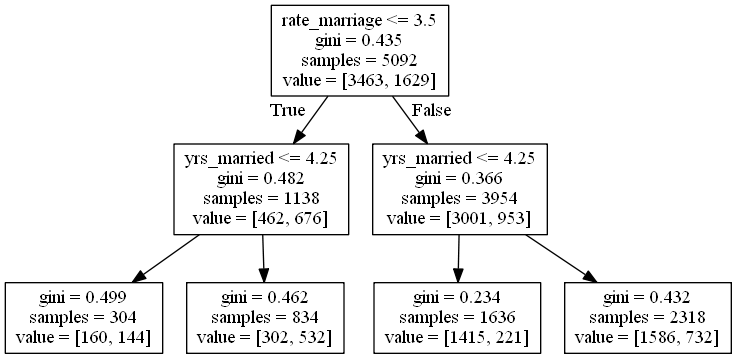

In [271]:
print("model9: max_depth=2, criterion='gini'")

dot_data = StringIO()  

export_graphviz(model9, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [272]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees

model10: max_depth=2, criterion='entropy'


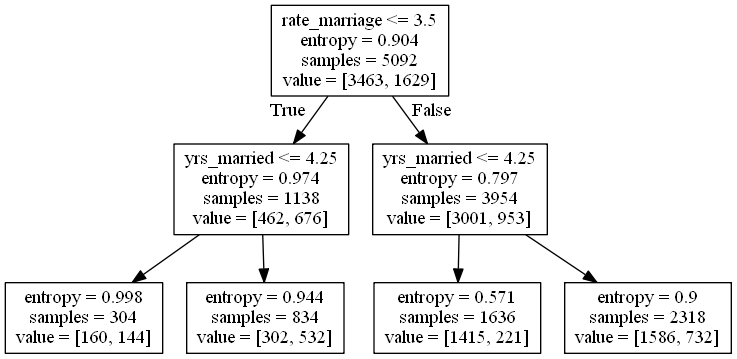

In [273]:
print("model10: max_depth=2, criterion='entropy'")

dot_data = StringIO()  

export_graphviz(model10, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

model12: max_depth=3, criterion='entropy'


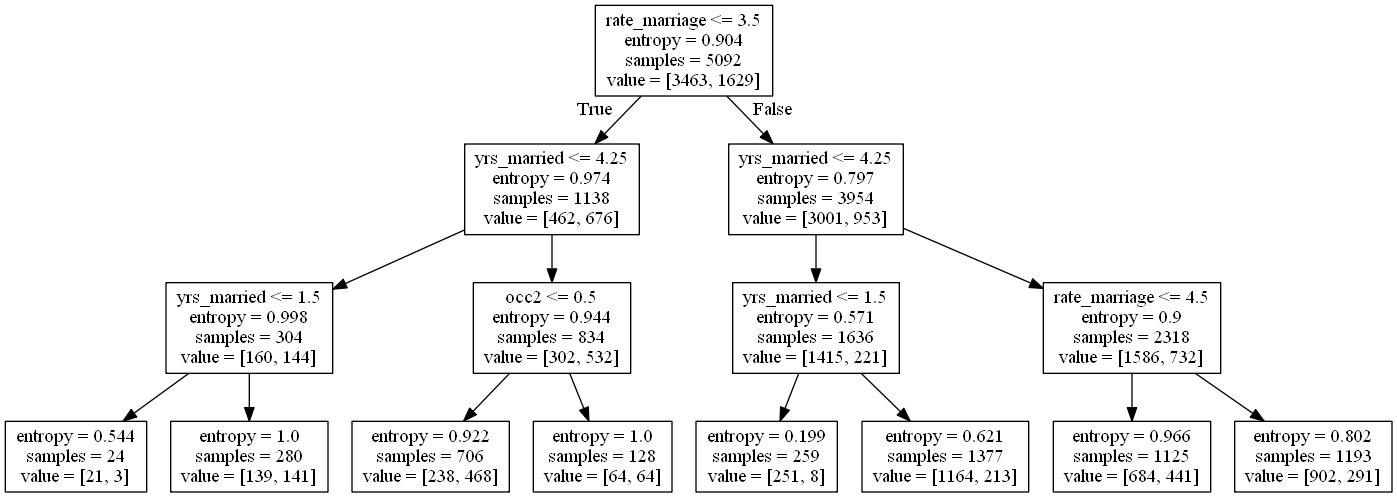

In [274]:
print("model12: max_depth=3, criterion='entropy'")

dot_data = StringIO()  

export_graphviz(model12, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

model14: max_depth=4, criterion='entropy'


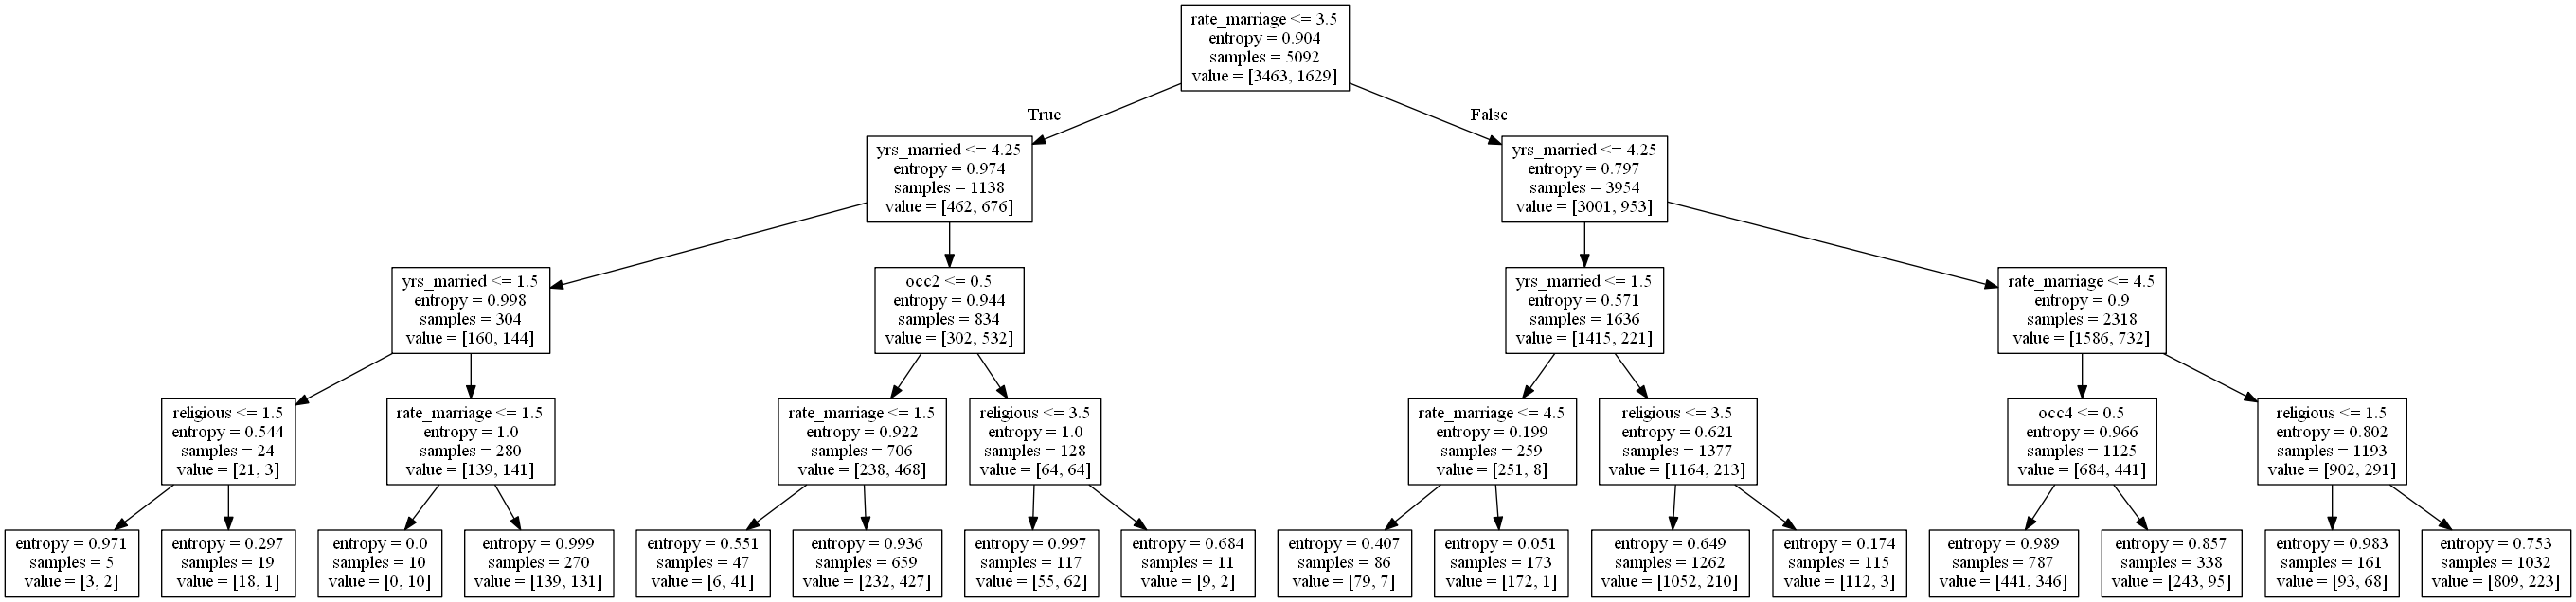

In [275]:
print("model14: max_depth=4, criterion='entropy'")

dot_data = StringIO()  

export_graphviz(model14, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [276]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [277]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       850
           1       0.51      0.44      0.47       424

    accuracy                           0.67      1274
   macro avg       0.62      0.61      0.61      1274
weighted avg       0.66      0.67      0.66      1274

0.6703296703296703


In [280]:
print("rfc_pred model yields less accuracy (0.6703296703296703), but higher F1 score (0.47) than decision tree models")

rfc_pred model yields less accuracy (0.6703296703296703), but higher F1 score (0.47) than decision tree models
